In [1]:
import albumentations as A
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.15 (you have 1.4.14). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


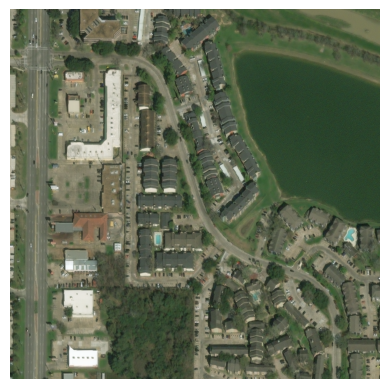

In [2]:
img_path = "/kaggle/input/sattelite-data/hurricane-harvey_00000135_pre_disaster.png"
image = Image.open(img_path)
plt.imshow(image)
plt.axis('off')
plt.show()

In [3]:
augmentations = [
    A.Flip(p=1), 
    A.Rotate(p=1), 
    A.RandomScale(p=1, scale_limit=0.5), 
    A.RandomBrightnessContrast(p=1), 
    A.HueSaturationValue(p=1)
]

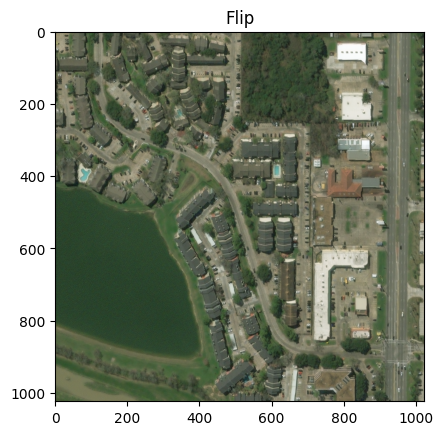

In [4]:
flip_aug = A.Flip(p=1)
flip_img = flip_aug(image=np.array(image))['image']
plt.imshow(flip_img)
plt.title("Flip")
plt.show()

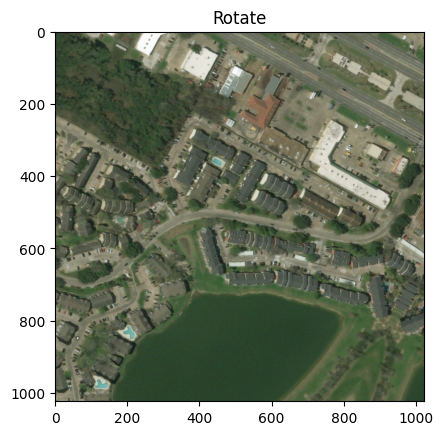

In [5]:
rotate_aug = A.Rotate(p=1, limit=150) # can change the angle
rotate_image = rotate_aug(image=np.array(image))['image']

plt.imshow(rotate_image)
plt.title("Rotate")
plt.show()

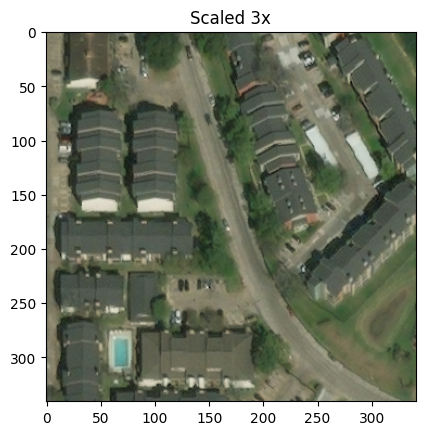

In [9]:
Scale_factor = 3
new_height = int(image.height / Scale_factor)
new_width = int(image.width / Scale_factor)

center_crop_aug = A.CenterCrop(height=new_height, width=new_width, p=1)
scaled_image = center_crop_aug(image=np.array(image))['image']

plt.imshow(scaled_image)
plt.title(f"Scaled {Scale_factor}x")
plt.show()

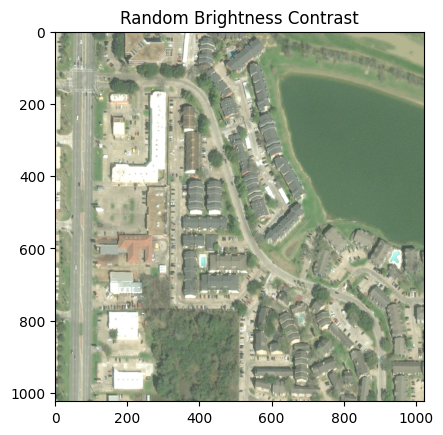

In [12]:
bright_contrast_aug = A.RandomBrightnessContrast(p=1)
bright_contrast_image = bright_contrast_aug(image=np.array(image))['image']

plt.imshow(bright_contrast_image)
plt.title("Random Brightness Contrast")
plt.show()

/tmp/ipykernel_36/4133520618.py:1: UserWarning: Argument 'saturation_shift_limit' is not valid and will be ignored.
  hsv_aug = A.HueSaturationValue(
/tmp/ipykernel_36/4133520618.py:1: UserWarning: Argument 'value_shift_limit' is not valid and will be ignored.
  hsv_aug = A.HueSaturationValue(


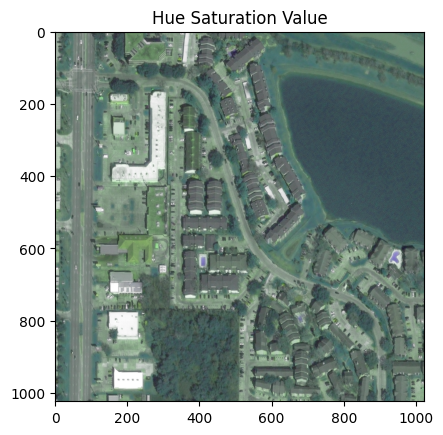

In [24]:
hsv_aug = A.HueSaturationValue(
    hue_shift_limit=-120,
    saturation_shift_limit=100,  
    value_shift_limit=100,  
    p=1)

hsv_image = hsv_aug(image=np.array(image))['image']

plt.imshow(hsv_image)
plt.title("Hue Saturation Value")
plt.show()

/tmp/ipykernel_36/4107389627.py:1: UserWarning: Argument 'eps' is not valid and will be ignored.
  gamma_aug = A.RandomGamma(


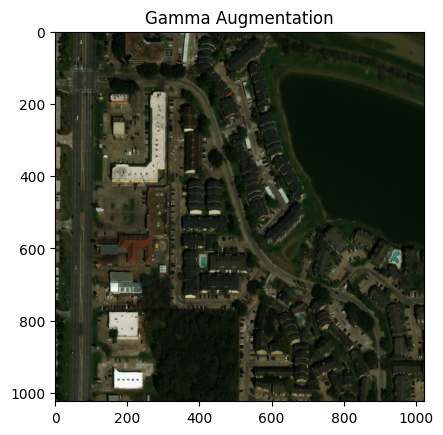

In [70]:
gamma_aug = A.RandomGamma(
    gamma_limit=(170, 200), 
    eps=None,
    p=1
)

image = np.array(Image.open(img_path))
augmented_image = gamma_aug(image=image)['image']

plt.imshow(augmented_image)
plt.title("Gamma Augmentation")
plt.show()

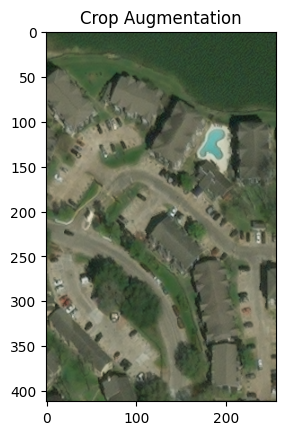

In [30]:
crop_aug = A.RandomCrop(
    height=412,  # Crop height
    width=256,  # Crop width
    p=1
)

image = np.array(Image.open(img_path))
augmented_image = crop_aug(image=image)['image']

plt.imshow(augmented_image)
plt.title("Crop Augmentation")
plt.show()

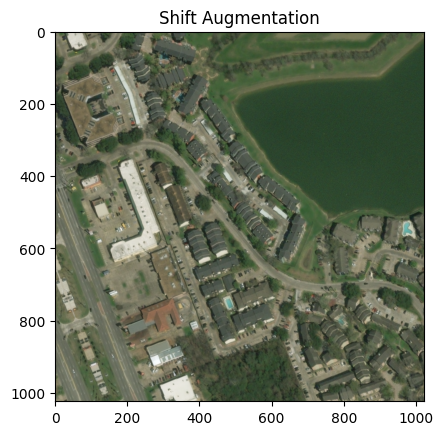

In [58]:
shift_aug = A.ShiftScaleRotate(
    shift_limit=0.15,  # Shift up to 15% of image size
    scale_limit=0.005,  # Scale up to 0.5% of original size
    rotate_limit=30,  # Rotate up to 30 degrees
    p=1
)

image = np.array(Image.open(img_path))
augmented_image = shift_aug(image=image)['image']

plt.imshow(augmented_image)
plt.title("Shift Augmentation")
plt.show()